In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [3]:
dataset=pd.read_csv('C:/Users/Akhil.pathak/Downloads/principal.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.head()
if set(['date']).issubset(dataset.columns):
    dataset.drop(['date'],axis=1, inplace=True)
    
#ds = dataset.sample(frac=1)
ds=dataset;
ds

,pc1,pc2,normality
0,-1.847125,-0.087182,1
1,-1.400199,0.159419,1
2,-2.627847,-0.697001,1
3,-1.906529,0.126705,1
4,-1.598385,-0.214070,1
5,-1.494772,-0.066351,1
6,-1.832324,0.129292,1
7,-1.854742,0.121941,1
8,-1.678902,2.202421,1
9,7.537439,-8.876311,0


In [4]:
x = ds.iloc[:,0:2]
y = ds.iloc[:,2:3]
pc1  = ds.iloc[:,0:1]
pc2  = ds.iloc[:,1:2]
x

,pc1,pc2
0,-1.847125,-0.087182
1,-1.400199,0.159419
2,-2.627847,-0.697001
3,-1.906529,0.126705
4,-1.598385,-0.214070
5,-1.494772,-0.066351
6,-1.832324,0.129292
7,-1.854742,0.121941
8,-1.678902,2.202421
9,7.537439,-8.876311


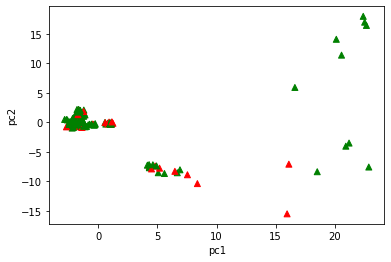

In [5]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(ds['pc1'], ds['pc2'], c=ds['normality'].apply(lambda x: colors[x]), marker = '^')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [7]:
from sklearn.cluster import KMeans
Kmean = KMeans(algorithm='auto',init='k-means++',n_clusters=6, max_iter=350)
Kmean.fit(x_train)
Kmean.cluster_centers_

array([[-1.61517708,  1.55973808],
       [20.46057243, 13.29109227],
       [-1.83916898,  0.03144519],
       [ 5.54363123, -8.02196404],
       [18.37669845, -9.62915911],
       [ 0.70609557, -0.19693182]])

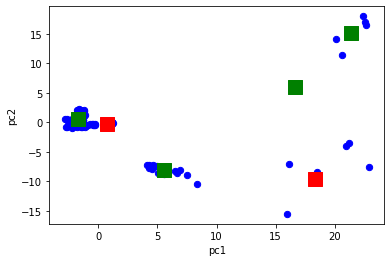

In [8]:
plt.scatter(pc1,pc2, s =40, c='b')
plt.scatter(-1.76682377,  0.52505531,s=200, c='g', marker='s')
plt.scatter(21.41779235, 15.13084673,s=200, c='g', marker='s')
plt.scatter(5.54363123, -8.02196404,s=200, c='g', marker='s')
plt.scatter(18.37669845, -9.62915911,s=200, c='r', marker='s')
plt.scatter(16.63169276,  5.93207445,s=200, c='g', marker='s')
plt.scatter(0.70609557, -0.19693182,s=200, c='r', marker='s')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()